## Workshop 5

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import tqdm
import random

In [2]:
df = pd.read_csv('Workshop-05-dataset.zip', sep='\t',dtype=np.str, 
                 low_memory=True)

#### Q1. Display the first five rows of the dataset.

In [3]:
df.head(5)

,transaction_ID,Date,Time,item_0,item_1,item_2,item_3,item_4,item_5,item_6,...,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40
0,536365,01/12/2010,08:26,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,536366,01/12/2010,08:28,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,536367,01/12/2010,08:34,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,536368,01/12/2010,08:34,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,536369,01/12/2010,08:35,BATH BUILDING BLOCK WORD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Q2. How many rows and columns are there in the dataset?

In [4]:
df.shape

(31941, 44)

The dataset has 31941 rows and 44 columns.

In [5]:
STUDENT_NAME = 'SubasThapa'
STUDENT_NO = '8468'

In [6]:
np.random.seed(int(STUDENT_NO))
unique_id = int('2' + STUDENT_NO)
rows = np.random.choice(df.index.values, unique_id)
data = df.loc[rows]

In [7]:
file_name = STUDENT_NAME + "_" + STUDENT_NO + ".csv"
data.to_csv(file_name, chunksize=10000)

#### Q3. How many unique dates are there in the dataset? HINT: You can use the .nunique() function available inPandas.

In [8]:
df['Date'].nunique()

305

In [9]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

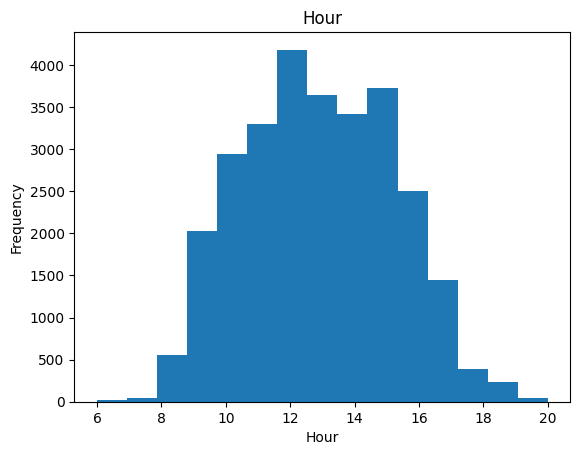

In [10]:
hour_hist = data.hist(column="Hour", bins=15, grid=False)

for ax in hour_hist.flatten():
    ax.set_xlabel("Hour")
    ax.set_ylabel("Frequency")

## Apyori Algorithm

In [11]:
#importing apyori
from apyori import apriori

**Excluding first 3 columnsand copying data to new dataframe named 'items_df'**

In [12]:
items_df=data[data.columns[3:44]]

**Displaying first 5 rows to see if new dataframe contains the item columns that we needed.**

In [13]:
items_df.head()

,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40
30257,CLASSIC GLASS COOKIE JAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25793,CHRISTMAS METAL POSTCARD WITH BELLS,ROLL WRAP VINTAGE CHRISTMAS,BOTANICAL GARDENS WALL CLOCK,VINTAGE CHRISTMAS STOCKING,CARD MOTORBIKE SANTA,CARD CHRISTMAS VILLAGE,ASSORTED COLOUR BIRD ORNAMENT,CLASSIC METAL BIRDCAGE PLANT HOLDER,CHARLOTTE BAG SUKI DESIGN,RED RETROSPOT SHOPPER BAG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9955,SET/3 POT PLANT CANDLES,12 PENCILS SMALL TUBE SKULL,12 PENCILS SMALL TUBE RED RETROSPOT,ROSE DU SUD CUSHION COVER,JUMBO BAG CHARLIE AND LOLA TOYS,SET/6 COLLAGE PAPER CUPS,SET/6 FRUIT SALAD PAPER CUPS,SET/6 COLLAGE PAPER PLATES,SET/6 RED SPOTTY PAPER PLATES,SWISS ROLL TOWEL PINK SPOTS,...,GLITTER HEART GARLAND WITH BELLS,DINOSAUR KEYRINGS ASSORTED,BINGO SET,MORE BUTTER METAL SIGN,JUMBO BAG SCANDINAVIAN BLUE PAISLEY,RED RETROSPOT PICNIC BAG,PACK OF 60 PINK PAISLEY CAKE CASES,PACK OF 12 WOODLAND TISSUES,BOHEMIAN COLLAGE STATIONERY SET,VINTAGE PAISLEY STATIONERY SET
24334,JUMBO BAG RED RETROSPOT,JUMBO BAG APPLES,JUMBO BAG STRAWBERRY,JUMBO BAG PINK POLKADOT,JUMBO BAG ALPHABET,JUMBO BAG SPACEBOY DESIGN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dropping null values from the above dataframe if there are any null values present in the row.**

In [14]:
baskets = items_df.T.apply(lambda x: x.dropna().tolist()).tolist()

In [15]:
print(len(baskets))

28468


Checking length of the dataframe after dropping null values in the above row. Original length of a dataframe with null values was 31941. So we can see that null values were dropped.

Printing first five transaction items.

In [16]:
for i in baskets[:5]:
    print(i)

['CLASSIC GLASS COOKIE JAR']
['CHRISTMAS METAL POSTCARD WITH BELLS', 'ROLL WRAP VINTAGE CHRISTMAS', 'BOTANICAL GARDENS WALL CLOCK', 'VINTAGE CHRISTMAS STOCKING', 'CARD MOTORBIKE SANTA', 'CARD CHRISTMAS VILLAGE', 'ASSORTED COLOUR BIRD ORNAMENT', 'CLASSIC METAL BIRDCAGE PLANT HOLDER', 'CHARLOTTE BAG SUKI DESIGN', 'RED RETROSPOT SHOPPER BAG', 'SEWING SUSAN 21 NEEDLE SET', 'DIAMANTE RING ASSORTED IN BOX', 'SET 12 COLOUR PENCILS DOLLY GIRL', '12 PENCILS SMALL TUBE SKULL', 'SET OF 10 LED DOLLY LIGHTS', 'WALL ART STOP FOR TEA', 'SET 12 KIDS COLOUR  CHALK STICKS', 'VINTAGE DOILY TRAVEL SEWING KIT', 'BAKING SET 9 PIECE RETROSPOT', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'BAKING SET SPACEBOY DESIGN']
['SET/3 POT PLANT CANDLES', '12 PENCILS SMALL TUBE SKULL', '12 PENCILS SMALL TUBE RED RETROSPOT', 'ROSE DU SUD CUSHION COVER', 'JUMBO BAG CHARLIE AND LOLA TOYS', 'SET/6 COLLAGE PAPER CUPS', 'SET/6 FRUIT SALAD PAPER CUPS', 'SET/6 COLLAGE PAPER PLATES', 'SET/6 RED SPOTTY PAPER PLATES', 'SWISS ROLL TOWEL 

**Creating association rules for the given set of values.**

In [17]:
association_rules = apriori(baskets, min_support=0.01, min_confidence=0.2, 
 min_lift=3, min_length=2)
association_results = list(association_rules)

**Checking number of generated rules.**

In [18]:
print('Rules generated: ', len(association_results))

Rules generated:  86


**Printing first association rule.**

In [19]:
print(association_results[0])

RelationRecord(items=frozenset({'ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE GREEN'}), support=0.012153997470844457, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), items_add=frozenset({'ALARM CLOCK BAKELIKE PINK'}), confidence=0.40279394644935973, lift=16.715361614461187), OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE PINK'}), items_add=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), confidence=0.5043731778425656, lift=16.715361614461184)])


In [20]:
print(association_results[1])

RelationRecord(items=frozenset({'ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED'}), support=0.01872277645075172, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), items_add=frozenset({'ALARM CLOCK BAKELIKE RED'}), confidence=0.6204889406286379, lift=19.539910577230156), OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE RED'}), items_add=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), confidence=0.5896017699115044, lift=19.53991057723016)])


### Analysing the Results


In [21]:
def display_rules(association_results):
    for item in association_results:
        pair = item[0] 
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(item[1]))
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")


In [22]:
display_rules(association_results[:10])

Rule: ALARM CLOCK BAKELIKE PINK -> ALARM CLOCK BAKELIKE GREEN
Support: 0.012153997470844457
Confidence: 0.40279394644935973
Lift: 16.715361614461187
Rule: ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKELIKE RED
Support: 0.01872277645075172
Confidence: 0.6204889406286379
Lift: 19.539910577230156
Rule: ALARM CLOCK BAKELIKE RED -> ALARM CLOCK BAKELIKE IVORY
Support: 0.010222003653224673
Confidence: 0.6139240506329114
Lift: 19.333174638736416
Rule: ALARM CLOCK BAKELIKE PINK -> ALARM CLOCK BAKELIKE RED
Support: 0.012716032035970212
Confidence: 0.5276967930029155
Lift: 16.617779096467917
Rule: CHARLOTTE BAG PINK POLKADOT -> CHARLOTTE BAG SUKI DESIGN
Support: 0.012048615989883377
Confidence: 0.4992721979621543
Lift: 18.800636152892338
Rule: CHARLOTTE BAG PINK POLKADOT -> RED RETROSPOT CHARLOTTE BAG
Support: 0.011346072783476184
Confidence: 0.47016011644832606
Lift: 14.48540930200319
Rule: SPACEBOY LUNCH BOX -> DOLLY GIRL LUNCH BOX
Support: 0.015561332021919347
Confidence: 0.5954301075268816
Li

In [23]:
from collections import Counter

counter = Counter(baskets[0])
for i in baskets[1:]:
    if i != 'nan':
        counter.update(i)
del counter['nan']
counter.most_common(10)

[('WHITE HANGING HEART T-LIGHT HOLDER', 2065),
 ('JUMBO BAG RED RETROSPOT', 1937),
 ('REGENCY CAKESTAND 3 TIER', 1891),
 ('PARTY BUNTING', 1502),
 ('LUNCH BAG RED RETROSPOT', 1444),
 ('ASSORTED COLOUR BIRD ORNAMENT', 1382),
 ('SET OF 3 CAKE TINS PANTRY DESIGN', 1319),
 ('PACK OF 72 RETROSPOT CAKE CASES', 1194),
 ('LUNCH BAG  BLACK SKULL', 1181),
 ('JUMBO BAG PINK POLKADOT', 1160)]

**Q4. How many of these items can you find in the rules you have just displayed? Are all the top 10 items
included? Provide an explanation as to why these items may be missing/present in the rules.**

I can only find **JUMBO BAG RED RETROSPOT** in the associated rule displayed above. Association rule doesn't extract individual customer's preference, rather find relationship between group of elements in every transaction. The main reason why those items are not displayed in association rule due to:

i. Less support value. Support gives an idea of how frequent an itemset is in all the transactions occured. Mathematically, support value is the fraction of total number of transactions in our dataset in which the particular itemset appears. Our min_support value is 0.01 i.e. 1% which indicates that in every 100 transaction there should be atleast 1 itemset.

ii. Less confidence value. Confidence value represents how likely the item follows another item.


## <font color='blue'>Report</font>

**Q5. Run the apriori algorithm with the following three different settings:**

i. Setting 1: Min Support = 0.015, Min Confidence = 0.7, Min Lift = 3

ii. Setting 2: Min Support = 0.009, Min Confidence = 0.5, Min Lift = 3

iii. Setting 3: Min Support = 0.015, Min Confidence = 0.5, Min Lift = 9

**Calculate the number of rules you get for each setting and discuss how the quality of the rules differ in each
setting.**

**Setting 1: Min Support = 0.015, Min Confidence = 0.7, Min Lift = 3**

In [24]:
association_rules = apriori(baskets, min_support=0.015, min_confidence=0.7, 
 min_lift=3, min_length=3)
association_results = list(association_rules)

In [25]:
print('Rules generated: ', len(association_results))

Rules generated:  3


In [26]:
print(association_results[0])

RelationRecord(items=frozenset({'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'}), support=0.017985106084024167, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PINK REGENCY TEACUP AND SAUCER'}), items_add=frozenset({'GREEN REGENCY TEACUP AND SAUCER'}), confidence=0.7901234567901234, lift=24.31701034367701)])


In [27]:
def display_rules(association_results):
    for item in association_results:
        pair = item[0] 
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(item[1]))
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

In [28]:
display_rules(association_results[:10])

Rule: PINK REGENCY TEACUP AND SAUCER -> GREEN REGENCY TEACUP AND SAUCER
Support: 0.017985106084024167
Confidence: 0.7901234567901234
Lift: 24.31701034367701
Rule: GREEN REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER
Support: 0.022902908528874527
Confidence: 0.7048648648648649
Lift: 20.85872450412991
Rule: PINK REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER
Support: 0.017212308556976252
Confidence: 0.7561728395061728
Lift: 22.377056543723207


**ii. Setting 2: Min Support = 0.009, Min Confidence = 0.5, Min Lift = 3**

In [29]:
association_rules = apriori(baskets, min_support=0.009, min_confidence=0.5, 
 min_lift=3, min_length=3)
association_results = list(association_rules)

In [30]:
print('Rules generated: ', len(association_results))

Rules generated:  44


In [31]:
print(association_results[0])

RelationRecord(items=frozenset({'ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE GREEN'}), support=0.012153997470844457, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE PINK'}), items_add=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), confidence=0.5043731778425656, lift=16.715361614461184)])


In [32]:
def display_rules(association_results):
    for item in association_results:
        pair = item[0] 
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(item[1]))
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

In [33]:
display_rules(association_results[:10])

Rule: ALARM CLOCK BAKELIKE PINK -> ALARM CLOCK BAKELIKE GREEN
Support: 0.012153997470844457
Confidence: 0.5043731778425656
Lift: 16.715361614461184
Rule: ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKELIKE RED
Support: 0.01872277645075172
Confidence: 0.6204889406286379
Lift: 19.539910577230156
Rule: ALARM CLOCK BAKELIKE RED -> ALARM CLOCK BAKELIKE IVORY
Support: 0.010222003653224673
Confidence: 0.6139240506329114
Lift: 19.333174638736416
Rule: ALARM CLOCK BAKELIKE PINK -> ALARM CLOCK BAKELIKE RED
Support: 0.012716032035970212
Confidence: 0.5276967930029155
Lift: 16.617779096467917
Rule: TOILET METAL SIGN -> BATHROOM METAL SIGN
Support: 0.009168188843613883
Confidence: 0.7250000000000001
Lift: 33.23558776167472
Rule: RED  HARMONICA IN BOX -> BLUE HARMONICA IN BOX
Support: 0.009765350569059998
Confidence: 0.5009009009009009
Lift: 22.96239427833631
Rule: SPACEBOY LUNCH BOX -> DOLLY GIRL LUNCH BOX
Support: 0.015561332021919347
Confidence: 0.5954301075268816
Lift: 20.952662918510836
Rule: JU

**iii. Setting 3: Min Support = 0.015, Min Confidence = 0.5, Min Lift = 9**

In [34]:
association_rules = apriori(baskets, min_support=0.015, min_confidence=0.5, 
 min_lift=9, min_length=3)
association_results = list(association_rules)

In [35]:
print('Rules generated: ', len(association_results))

Rules generated:  10


In [36]:
print(association_results[0])

RelationRecord(items=frozenset({'ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED'}), support=0.01872277645075172, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), items_add=frozenset({'ALARM CLOCK BAKELIKE RED'}), confidence=0.6204889406286379, lift=19.539910577230156), OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE RED'}), items_add=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), confidence=0.5896017699115044, lift=19.53991057723016)])


In [37]:
def display_rules(association_results):
    for item in association_results:
        pair = item[0] 
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(item[1]))
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

In [38]:
display_rules(association_results[:10])

Rule: ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKELIKE RED
Support: 0.01872277645075172
Confidence: 0.6204889406286379
Lift: 19.539910577230156
Rule: SPACEBOY LUNCH BOX -> DOLLY GIRL LUNCH BOX
Support: 0.015561332021919347
Confidence: 0.5954301075268816
Lift: 20.952662918510836
Rule: GARDENERS KNEELING PAD CUP OF TEA -> GARDENERS KNEELING PAD KEEP CALM
Support: 0.01787972460306309
Confidence: 0.6963064295485636
Lift: 22.272417344256752
Rule: PINK REGENCY TEACUP AND SAUCER -> GREEN REGENCY TEACUP AND SAUCER
Support: 0.017985106084024167
Confidence: 0.5535135135135134
Lift: 24.317010343677005
Rule: GREEN REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER
Support: 0.022902908528874527
Confidence: 0.7048648648648649
Lift: 20.85872450412991
Rule: HEART OF WICKER SMALL -> HEART OF WICKER LARGE
Support: 0.015701840663200788
Confidence: 0.5096921322690992
Lift: 13.226905762476495
Rule: JUMBO BAG RED RETROSPOT -> JUMBO BAG STRAWBERRY
Support: 0.015034424617113953
Confidence: 0.61939

Looking at the apriori algorithm we applied above for 3 different settings we have got 3, 44, and 10 association rules for setting i, setting ii, setting iii respectively. 
Setting 1: Min Support = 0.015, Min Confidence = 0.7, Min Lift = 3
Setting 2: Min Support = 0.009, Min Confidence = 0.5, Min Lift = 3
Setting 3: Min Support = 0.015, Min Confidence = 0.5, Min Lift = 9

We can draw a conclusion that:

i. Lower the minimum support value, higher the number of association rules. Support gives an idea of how frequent an itemset is in all the transactions occured.

ii. Higher the minimum confidence value, lower the number of association rules.Confidence value represents how likely the item follows another item.

iii. Higher the minimum lif value, higher the association rule. 

**Q6. Filter the transactions from the day of the week or the month and generate association rules again. Discuss whether the rules change in different days or different months.**

In [39]:
data['Month'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.month

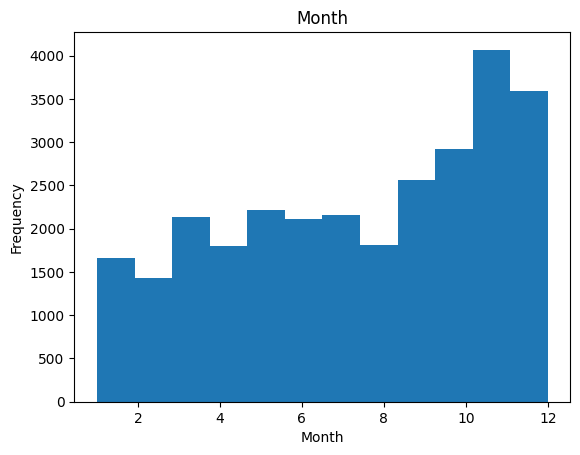

In [40]:
month_hist = data.hist(column="Month", bins=12, grid=False)

for ax in month_hist.flatten():
    ax.set_xlabel("Month")
    ax.set_ylabel("Frequency")

It can be seen from the above histogram that most of the transactions were performed in October, November, and December. While less transactions were recorded during January and February. 

In [41]:
data.head(2)

,transaction_ID,Date,Time,item_0,item_1,item_2,item_3,item_4,item_5,item_6,...,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,Hour,Month
30257,C579415,29/11/2011,12:52,CLASSIC GLASS COOKIE JAR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,11
25793,573341,30/10/2011,11:55,CHRISTMAS METAL POSTCARD WITH BELLS,ROLL WRAP VINTAGE CHRISTMAS,BOTANICAL GARDENS WALL CLOCK,VINTAGE CHRISTMAS STOCKING,CARD MOTORBIKE SANTA,CARD CHRISTMAS VILLAGE,ASSORTED COLOUR BIRD ORNAMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,10


In [42]:
new_items_df=data[data.columns[3:44]]

In [43]:
new_items_df.head()

,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40
30257,CLASSIC GLASS COOKIE JAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25793,CHRISTMAS METAL POSTCARD WITH BELLS,ROLL WRAP VINTAGE CHRISTMAS,BOTANICAL GARDENS WALL CLOCK,VINTAGE CHRISTMAS STOCKING,CARD MOTORBIKE SANTA,CARD CHRISTMAS VILLAGE,ASSORTED COLOUR BIRD ORNAMENT,CLASSIC METAL BIRDCAGE PLANT HOLDER,CHARLOTTE BAG SUKI DESIGN,RED RETROSPOT SHOPPER BAG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9955,SET/3 POT PLANT CANDLES,12 PENCILS SMALL TUBE SKULL,12 PENCILS SMALL TUBE RED RETROSPOT,ROSE DU SUD CUSHION COVER,JUMBO BAG CHARLIE AND LOLA TOYS,SET/6 COLLAGE PAPER CUPS,SET/6 FRUIT SALAD PAPER CUPS,SET/6 COLLAGE PAPER PLATES,SET/6 RED SPOTTY PAPER PLATES,SWISS ROLL TOWEL PINK SPOTS,...,GLITTER HEART GARLAND WITH BELLS,DINOSAUR KEYRINGS ASSORTED,BINGO SET,MORE BUTTER METAL SIGN,JUMBO BAG SCANDINAVIAN BLUE PAISLEY,RED RETROSPOT PICNIC BAG,PACK OF 60 PINK PAISLEY CAKE CASES,PACK OF 12 WOODLAND TISSUES,BOHEMIAN COLLAGE STATIONERY SET,VINTAGE PAISLEY STATIONERY SET
24334,JUMBO BAG RED RETROSPOT,JUMBO BAG APPLES,JUMBO BAG STRAWBERRY,JUMBO BAG PINK POLKADOT,JUMBO BAG ALPHABET,JUMBO BAG SPACEBOY DESIGN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
baskets = new_items_df.T.apply(lambda x: x.dropna().tolist()).tolist()

In [45]:
for i in baskets[:5]:
    print(i)

['CLASSIC GLASS COOKIE JAR']
['CHRISTMAS METAL POSTCARD WITH BELLS', 'ROLL WRAP VINTAGE CHRISTMAS', 'BOTANICAL GARDENS WALL CLOCK', 'VINTAGE CHRISTMAS STOCKING', 'CARD MOTORBIKE SANTA', 'CARD CHRISTMAS VILLAGE', 'ASSORTED COLOUR BIRD ORNAMENT', 'CLASSIC METAL BIRDCAGE PLANT HOLDER', 'CHARLOTTE BAG SUKI DESIGN', 'RED RETROSPOT SHOPPER BAG', 'SEWING SUSAN 21 NEEDLE SET', 'DIAMANTE RING ASSORTED IN BOX', 'SET 12 COLOUR PENCILS DOLLY GIRL', '12 PENCILS SMALL TUBE SKULL', 'SET OF 10 LED DOLLY LIGHTS', 'WALL ART STOP FOR TEA', 'SET 12 KIDS COLOUR  CHALK STICKS', 'VINTAGE DOILY TRAVEL SEWING KIT', 'BAKING SET 9 PIECE RETROSPOT', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'BAKING SET SPACEBOY DESIGN']
['SET/3 POT PLANT CANDLES', '12 PENCILS SMALL TUBE SKULL', '12 PENCILS SMALL TUBE RED RETROSPOT', 'ROSE DU SUD CUSHION COVER', 'JUMBO BAG CHARLIE AND LOLA TOYS', 'SET/6 COLLAGE PAPER CUPS', 'SET/6 FRUIT SALAD PAPER CUPS', 'SET/6 COLLAGE PAPER PLATES', 'SET/6 RED SPOTTY PAPER PLATES', 'SWISS ROLL TOWEL 

In [46]:
new_association_rules = apriori(baskets, min_support=0.01, min_confidence=0.2, 
 min_lift=3, min_length=2)
new_association_results = list(new_association_rules)

In [47]:
print('Rules generated: ', len(new_association_results))

Rules generated:  86


In [48]:
print(new_association_results[0])

RelationRecord(items=frozenset({'ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE GREEN'}), support=0.012153997470844457, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), items_add=frozenset({'ALARM CLOCK BAKELIKE PINK'}), confidence=0.40279394644935973, lift=16.715361614461187), OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE PINK'}), items_add=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), confidence=0.5043731778425656, lift=16.715361614461184)])


In [49]:
def display_rules(new_association_results):
    for item in new_association_results:
        pair = item[0] 
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(item[1]))
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

In [50]:
display_rules(new_association_results[:10])

Rule: ALARM CLOCK BAKELIKE PINK -> ALARM CLOCK BAKELIKE GREEN
Support: 0.012153997470844457
Confidence: 0.40279394644935973
Lift: 16.715361614461187
Rule: ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKELIKE RED
Support: 0.01872277645075172
Confidence: 0.6204889406286379
Lift: 19.539910577230156
Rule: ALARM CLOCK BAKELIKE RED -> ALARM CLOCK BAKELIKE IVORY
Support: 0.010222003653224673
Confidence: 0.6139240506329114
Lift: 19.333174638736416
Rule: ALARM CLOCK BAKELIKE PINK -> ALARM CLOCK BAKELIKE RED
Support: 0.012716032035970212
Confidence: 0.5276967930029155
Lift: 16.617779096467917
Rule: CHARLOTTE BAG PINK POLKADOT -> CHARLOTTE BAG SUKI DESIGN
Support: 0.012048615989883377
Confidence: 0.4992721979621543
Lift: 18.800636152892338
Rule: CHARLOTTE BAG PINK POLKADOT -> RED RETROSPOT CHARLOTTE BAG
Support: 0.011346072783476184
Confidence: 0.47016011644832606
Lift: 14.48540930200319
Rule: SPACEBOY LUNCH BOX -> DOLLY GIRL LUNCH BOX
Support: 0.015561332021919347
Confidence: 0.5954301075268816
Li

Association rule is used to explore and interpret large transactional dataset in order to identify the unique patterns and rules. These patterns define relationships and interactions between different itemssets in transactional dataset. Using this algorithm, we can answer queries such as what items customers buy together. It also indicates frequent sets of goods customers buy. This rule doesn't tie back a user's transaction over time to identify relationship. So, we will be getting same result both times.